<a href="https://colab.research.google.com/github/moinuddin515/Breast_cancer/blob/main/Copy_of_JasrinBrotherFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings

warnings.filterwarnings('ignore')

results = {}

In [ ]:
columns = ['class','id','seq']
df = pd.read_csv('/content/drive/My Drive/promoters.data',names=columns)

In [ ]:
df.head(10)

,class,id,seq
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [ ]:
#clean sequences
def clean(s):
    return s.replace('\t','')

df['seq'] = df['seq'].apply(clean)

In [ ]:
df.head(10)

,class,id,seq
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,+,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...
5,+,MALEFG,aggggcaaggaggatggaaagaggttgccgtataaagaaactagag...
6,+,MALK,cagggggtggaggatttaagccatctcctgatgacgcatagtcagc...
7,+,RECA,tttctacaaaacacttgatactgtatgagcatacagtataattgct...
8,+,RPOB,cgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaa...
9,+,RRNAB_P1,ttttaaatttcctcttgtcaggccggaataactccctataatgcgc...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   106 non-null    object
 1   id      106 non-null    object
 2   seq     106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


sequence length value counts: 57    106
Name: lengths, dtype: int64


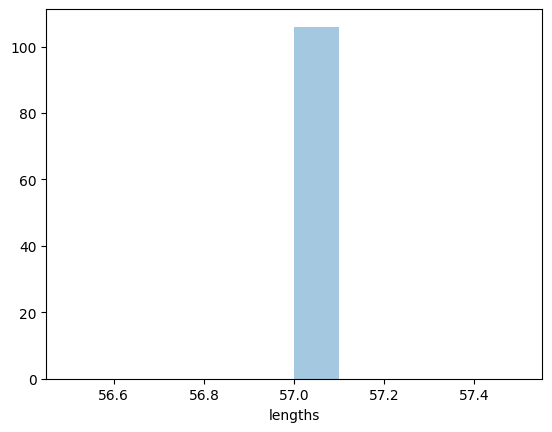

In [ ]:
lengths = []
for s in df['seq']: lengths.append(len(s))
df['lengths'] = lengths
print('sequence length value counts:', df['lengths'].value_counts())

sns.distplot(df['lengths'],kde=False);

number of classes: 2
class: +    number of values: 53
class: -    number of values: 53



Text(0.5, 1.0, 'class proportions')

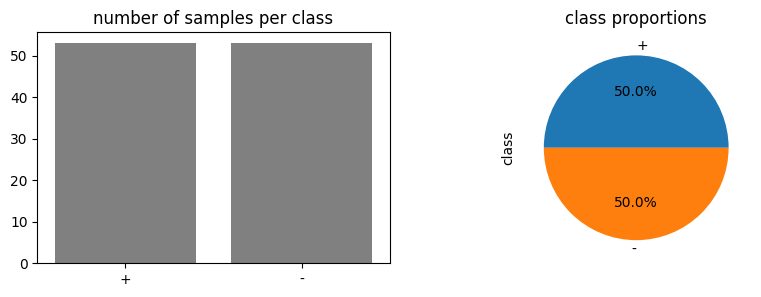

In [ ]:
n_classes = df['class'].nunique()
print('number of classes:', n_classes)
label_counts = df['class'].value_counts()

for c,v in zip(label_counts.index, label_counts.values):
    print('class: {}    number of values: {}'.format(c,v))

print('')
plt.figure(figsize=(10,3));
plt.subplot(1,2,1);
sns.barplot(x= label_counts.index, y=label_counts.values,
            color='Grey');
plt.title('number of samples per class');
plt.subplot(1,2,2);
df['class'].value_counts().plot(kind='pie',autopct='%.1f%%');
plt.title('class proportions')

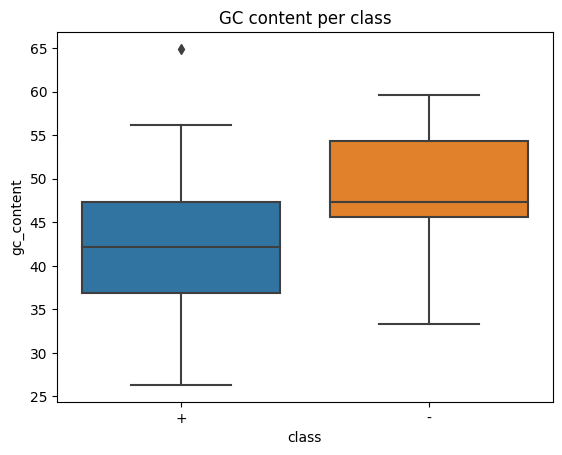

In [ ]:
def gc_content (s):
    l = len(s)
    lgc = 0
    for c in s.lower():
        if c in ['c','g']: lgc += 1
    return lgc/l*100

df['gc_content'] = df['seq'].apply(gc_content)

sns.boxplot(x='class',y='gc_content',data=df);
plt.title('GC content per class');

In [ ]:
alphabet = ['a','c','g','t']
codon_list = []
for a in alphabet:
    for b in alphabet:
        for c in alphabet:
            codon_list.append(a+b+c)

In [ ]:
freqs = []

for codon in codon_list:
    for s in df['seq']:
        freqs.append(s.count(codon))

freqs = np.reshape(np.array(freqs),(df.shape[0],len(codon_list)))
cf = pd.DataFrame(data=freqs,columns=codon_list,dtype='int')
cf['label']=df['class']
cf.head(2)

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt,label
0,0,0,0,1,2,3,0,1,2,1,...,2,0,0,0,0,0,0,1,0,+
1,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,2,2,0,1,2,+


In [ ]:
positives = []
negatives = []

for codon in codon_list:
    positives.append(cf[cf['label'] == '+'][codon].sum()/106)
    negatives.append(cf[cf['label'] == '-'][codon].sum()/106)

codon_freqs = pd.DataFrame([])
for c,n,p in zip(codon_list,negatives,positives): codon_freqs[c]=pd.Series([n,p])
codon_freqs.head()

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt
0,0.396226,0.452830,0.396226,0.405660,0.528302,0.433962,0.405660,0.462264,0.367925,0.594340,...,0.462264,0.45283,0.443396,0.462264,0.537736,0.471698,0.377358,0.358491,0.349057,0.386792
1,0.386792,0.424528,0.405660,0.349057,0.415094,0.367925,0.339623,0.433962,0.396226,0.377358,...,0.339623,0.40566,0.396226,0.471698,0.415094,0.405660,0.481132,0.443396,0.330189,0.424528


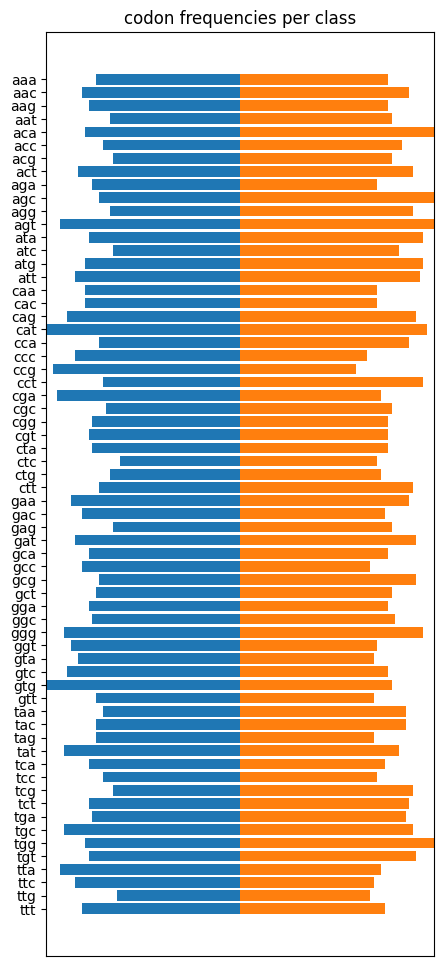

In [ ]:
width = np.sum((cf.groupby(by='label').sum()/106).values,axis=0).max()
fig,ax=plt.subplots(figsize=(5,12));
ax.invert_yaxis();
ax.xaxis.set_visible(False);
ax.set_xlim(0,width);
ax.barh(codon_list,(cf.groupby(by='label').sum()/106).iloc[0],
       left=width/2-(cf.groupby(by='label').sum()/106).iloc[0]);
ax.barh(codon_list,(cf.groupby(by='label').sum()/106).iloc[1],
      left=width/2);
plt.title('codon frequencies per class');

accuracy: 0.7169811320754716
f1-score: 0.7580645161290323


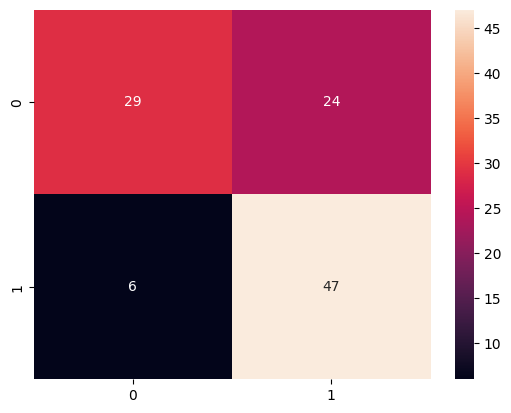

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
y = lbl.fit_transform(df['class'].values)

#classify samples on whether gc_content is aboveor below 43%
ccs = []
for i in df['gc_content']:
    if i < 43: ccs.append(0)
    else: ccs.append(1)

from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
print('accuracy:', accuracy_score(y,ccs))
print('f1-score:', f1_score(y,ccs))
sns.heatmap(confusion_matrix(y,ccs),annot=True,fmt='1d');

results['GC_content->thresholding'] = [accuracy_score(y,ccs), f1_score(y,ccs)]

Data Preparation


In [ ]:
# combine codon frequencies and gc_content into a dataframe
cf['gc_content'] = df['gc_content']
cf.head(3)

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt,label,gc_content
0,0,0,0,1,2,3,0,1,2,1,...,0,0,0,0,0,0,1,0,+,47.368421
1,0,0,0,0,0,0,0,1,0,1,...,1,0,0,2,2,0,1,2,+,47.368421
2,2,2,1,1,0,0,2,1,1,2,...,3,0,1,0,1,3,2,1,+,40.350877


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


lab = LabelEncoder()
y = lab.fit_transform(cf['label'].values)

x = cf.drop(columns='label').values

x_tr,x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.1)

accuracy: 0.5454545454545454
f1-score: 0.5454545454545454


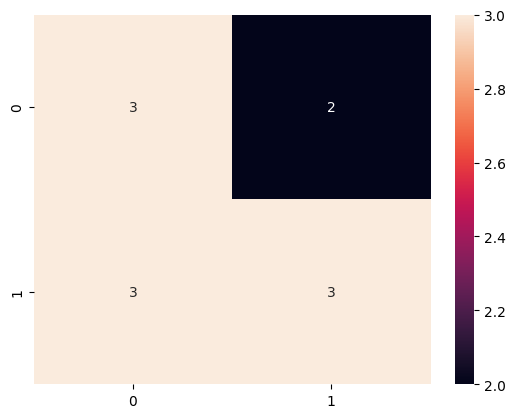

In [ ]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
pred=lr.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Statistical features -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

accuracy: 0.6363636363636364
f1-score: 0.6666666666666666


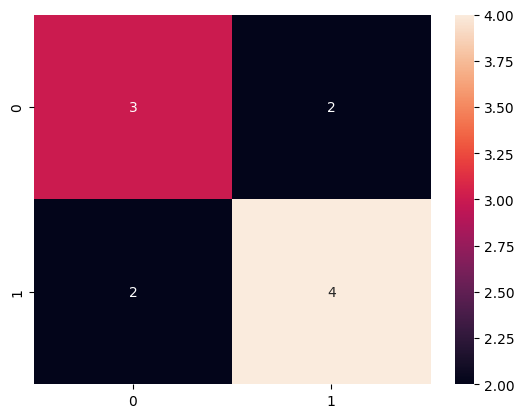

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000,max_depth=7)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Statistical features -> Random Forest'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

accuracy: 0.6363636363636364
f1-score: 0.6666666666666666


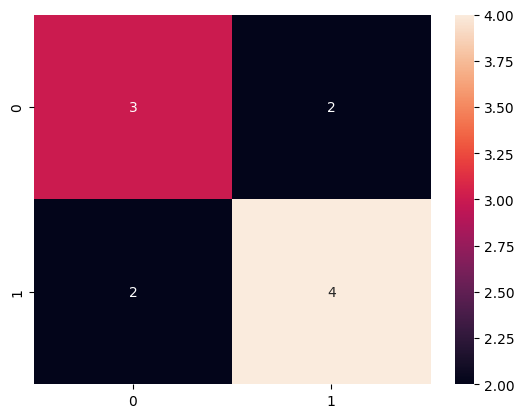

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(x_tr,y_tr)
pred1 = clf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred1))
print('f1-score:', f1_score(y_ts,pred1))
sns.heatmap(confusion_matrix(y_ts,pred1),annot=True,fmt='1d');

results['Statistical features -> Decision tree'] = [accuracy_score(y_ts,pred1), f1_score(y_ts,pred1)]

accuracy: 0.5454545454545454
f1-score: 0.5454545454545454


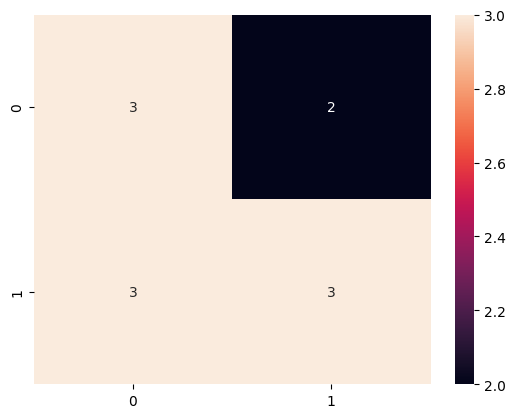

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(x_tr,y_tr)
pred1 = clf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred1))
print('f1-score:', f1_score(y_ts,pred1))
sns.heatmap(confusion_matrix(y_ts,pred1),annot=True,fmt='1d');

results['Statistical features -> Decision tree'] = [accuracy_score(y_ts,pred1), f1_score(y_ts,pred1)]

accuracy: 0.7272727272727273
f1-score: 0.7692307692307692


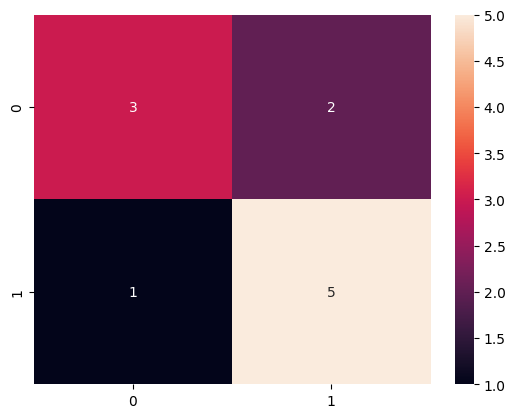

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_tr,y_tr)
knnpred = knn.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,knnpred))
print('f1-score:', f1_score(y_ts,knnpred))
sns.heatmap(confusion_matrix(y_ts,knnpred),annot=True,fmt='1d');

results['Statistical features -> KNN'] = [accuracy_score(y_ts,knnpred), f1_score(y_ts,knnpred)]

accuracy: 0.6363636363636364
f1-score: 0.6666666666666666


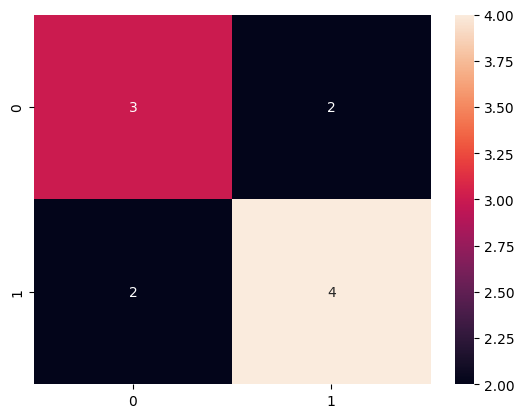

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf4 = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf4.fit(x_tr,y_tr)
xtraapred = clf4.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,xtraapred))
print('f1-score:', f1_score(y_ts,xtraapred))
sns.heatmap(confusion_matrix(y_ts,xtraapred),annot=True,fmt='1d');

results['Statistical features -> Extraa tree classifier'] = [accuracy_score(y_ts,xtraapred), f1_score(y_ts,xtraapred)]

Hexamar analysis
Classification on k-mers is a common approach used in bioinformatics and computational biology. K-mers are subsequences of length k that are derived from longer DNA or protein sequences. The classification of k-mers involves using these short subsequences as features to classify or predict different biological properties or phenomena.

In [ ]:
#hexamers (k=6)
alphabet = ['a','c','g','t']
exa_list = []
for a in alphabet:
    for b in alphabet:
        for c in alphabet:
            for d in alphabet:
                for e in alphabet:
                    for f in alphabet:  exa_list.append(a+b+c+d+e+f)

#create arrays for each hexamer, len = n_samples
#if sample x contains hexamer h, then h[x]=1, else 0
exarray = np.zeros((df.shape[0],len(exa_list)),dtype='int')
for i,s in enumerate(df['seq']):
    for j,ex in enumerate(exa_list):
        if ex in s: exarray[i,j] = 1

#merge arrays into a dataframe
examers = pd.DataFrame([])
for i,ex in enumerate(exa_list):
    examers[ex] = pd.Series(exarray[:,i])

examers.head(2)

,aaaaaa,aaaaac,aaaaag,aaaaat,aaaaca,aaaacc,aaaacg,aaaact,aaaaga,aaaagc,...,ttttcg,ttttct,ttttga,ttttgc,ttttgg,ttttgt,ttttta,tttttc,tttttg,tttttt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


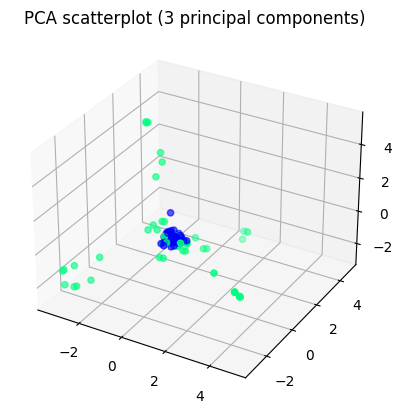

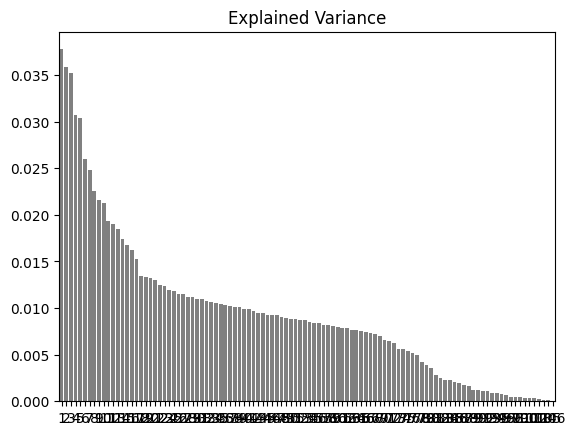

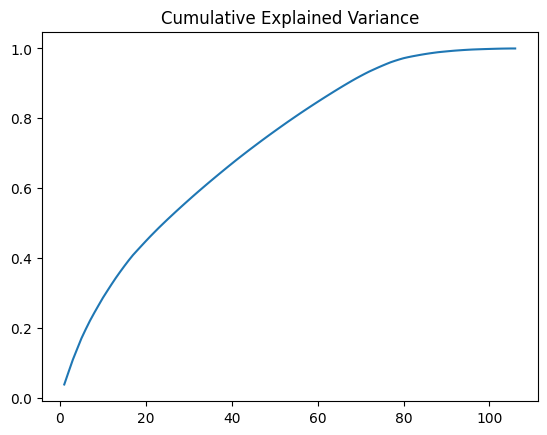

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder()
y= enc.fit_transform(df['class'].values)

pca = PCA()
ex_pca = pca.fit_transform(examers.values)

plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(ex_pca[:,0], ex_pca[:,1], ex_pca[:,2], c=y, cmap='winter');
plt.title('PCA scatterplot (3 principal components)');

plt.figure();
var_index = np.arange(pca.explained_variance_.shape[0])+1
sns.barplot(x = var_index, y = pca.explained_variance_ratio_,color='gray');
plt.title('Explained Variance');

plt.figure();
sns.lineplot(x= var_index, y = pca.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance');


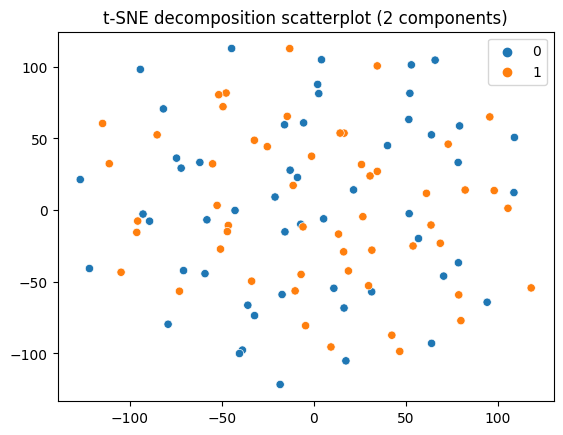

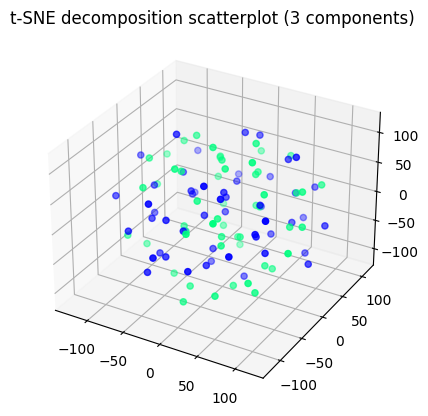

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=33)
ts_ex = tsne.fit_transform(examers.values)

sns.scatterplot(x = ts_ex[:,0], y = ts_ex[:,1],hue=y);
plt.title('t-SNE decomposition scatterplot (2 components)');
plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(ts_ex[:,0], ts_ex[:,1], ts_ex[:,2], c=y, cmap='winter');
plt.title('t-SNE decomposition scatterplot (3 components)');

logistic on hexamar

accuracy: 0.9090909090909091
f1-score: 0.923076923076923


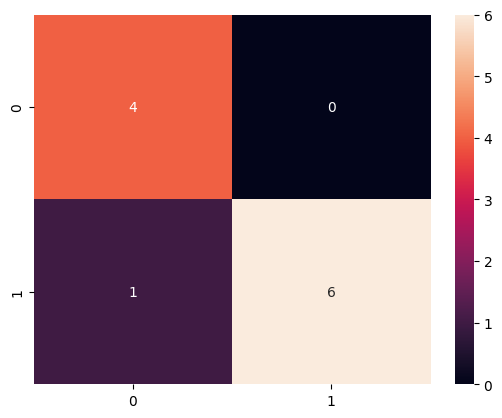

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_tr,x_ts,y_tr,y_ts = train_test_split(examers.values, y, test_size=0.1,random_state=33)

lr=LogisticRegression()
lr.fit(x_tr,y_tr)
pred=lr.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Hexamers -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

logistic on PCA-decomposed Hexamers

accuracy: 0.9090909090909091
f1-score: 0.9333333333333333


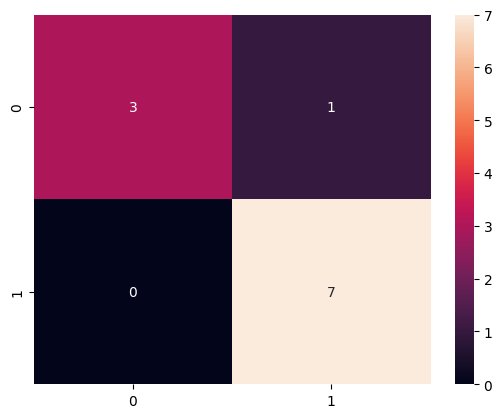

In [ ]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
lr1=LogisticRegression()
lr1.fit(x_pca_tr,y_tr)
pred=lr1.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['PCA-decomposed Hexamers -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

accuracy: 0.8181818181818182
f1-score: 0.8333333333333333


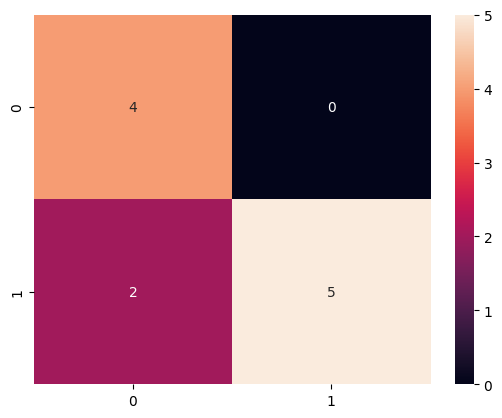

In [ ]:
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Hexamers -> Random Forest'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

accuracy: 0.9090909090909091
f1-score: 0.923076923076923


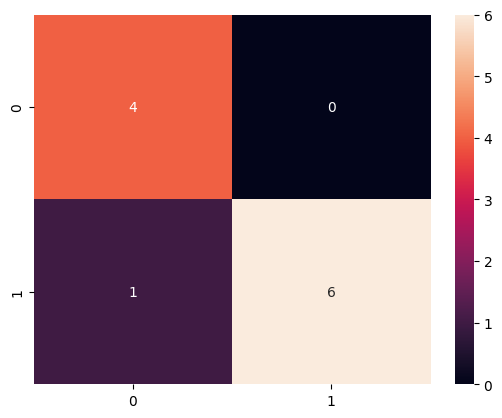

In [ ]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
rf.fit(x_pca_tr,y_tr)
pred2dec = rf.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,pred2dec))
print('f1-score:', f1_score(y_ts,pred2dec))
sns.heatmap(confusion_matrix(y_ts,pred2dec),annot=True,fmt='1d');

results['Hexamers -> Random Forest PCA'] = [accuracy_score(y_ts,pred2dec), f1_score(y_ts,pred2dec)]

accuracy: 0.7272727272727273
f1-score: 0.7999999999999999


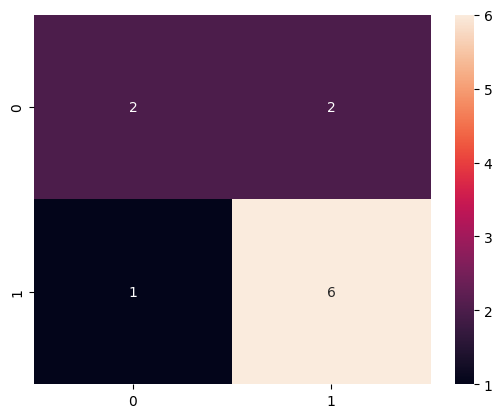

In [ ]:
clf2d=DecisionTreeClassifier(max_depth=6, random_state=1)
clf2d.fit(x_tr,y_tr)
pred2d = clf2d.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred2d))
print('f1-score:', f1_score(y_ts,pred2d))
sns.heatmap(confusion_matrix(y_ts,pred2d),annot=True,fmt='1d');

results['Statistical features -> Decision tree'] = [accuracy_score(y_ts,pred2d), f1_score(y_ts,pred2d)]

accuracy: 0.7272727272727273
f1-score: 0.7999999999999999


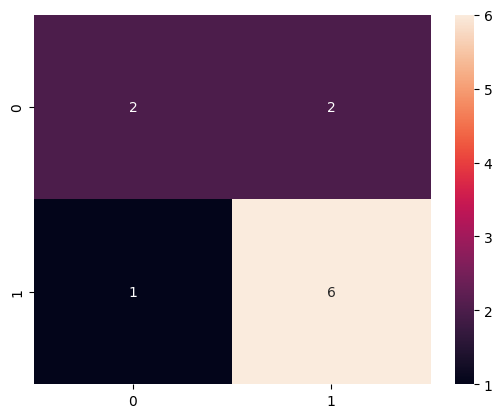

In [ ]:
clf2d=DecisionTreeClassifier(max_depth=6, random_state=42)
clf2d.fit(x_tr,y_tr)
pred2d = clf2d.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred2d))
print('f1-score:', f1_score(y_ts,pred2d))
sns.heatmap(confusion_matrix(y_ts,pred2d),annot=True,fmt='1d');

results['Statistical features -> Decision tree'] = [accuracy_score(y_ts,pred2d), f1_score(y_ts,pred2d)]

accuracy: 0.9090909090909091
f1-score: 0.923076923076923


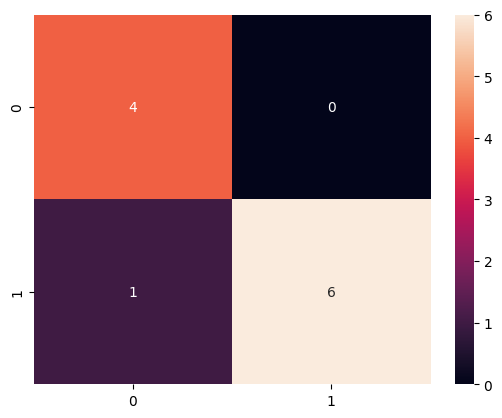

In [ ]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
clf2dpca=DecisionTreeClassifier(max_depth=6, random_state=1)
clf2dpca.fit(x_pca_tr,y_tr)
pred2dpca = clf2dpca.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,pred2dpca))
print('f1-score:', f1_score(y_ts,pred2dpca))
sns.heatmap(confusion_matrix(y_ts,pred2dpca),annot=True,fmt='1d');

results['Statistical features -> Decision tree'] = [accuracy_score(y_ts,pred2dpca), f1_score(y_ts,pred2dpca)]

accuracy: 0.9090909090909091
f1-score: 0.9333333333333333


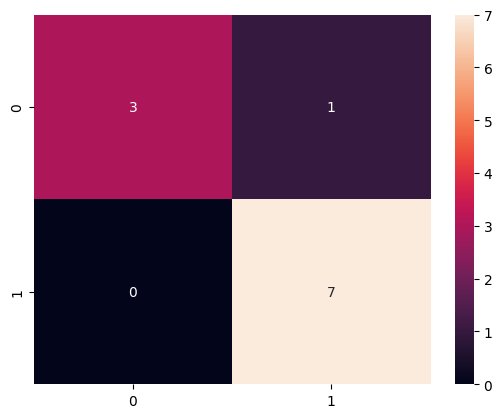

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 5).fit(x_tr,y_tr)
knnpred2 = knn2.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,knnpred2))
print('f1-score:', f1_score(y_ts,knnpred2))
sns.heatmap(confusion_matrix(y_ts,knnpred2),annot=True,fmt='1d');

results['Statistical features -> KNN'] = [accuracy_score(y_ts,knnpred2), f1_score(y_ts,knnpred2)]

accuracy: 0.7272727272727273
f1-score: 0.7272727272727273


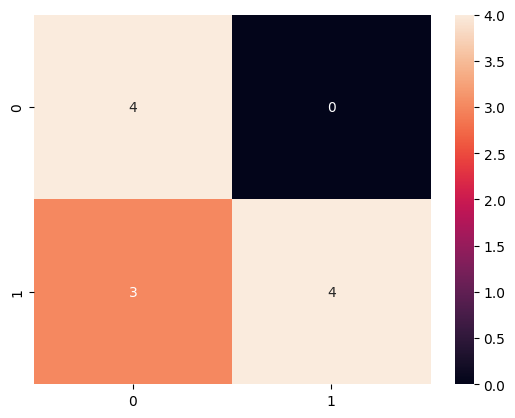

In [ ]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
knn3 = KNeighborsClassifier(n_neighbors = 5).fit(x_pca_tr,y_tr)
knnpred3 = knn3.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,knnpred3))
print('f1-score:', f1_score(y_ts,knnpred3))
sns.heatmap(confusion_matrix(y_ts,knnpred3),annot=True,fmt='1d');

results['Statistical features -> KNN'] = [accuracy_score(y_ts,knnpred3), f1_score(y_ts,knnpred3)]

accuracy: 0.8181818181818182
f1-score: 0.8333333333333333


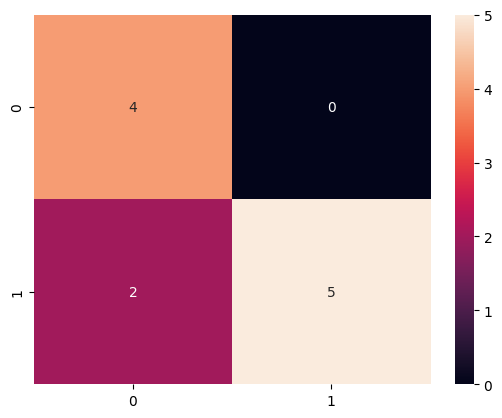

In [ ]:
clf8 = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf8.fit(x_tr,y_tr)
xtraapred2 = clf8.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,xtraapred2))
print('f1-score:', f1_score(y_ts,xtraapred2))
sns.heatmap(confusion_matrix(y_ts,xtraapred2),annot=True,fmt='1d');

results['Statistical features -> Extraa tree classifier'] = [accuracy_score(y_ts,xtraapred2), f1_score(y_ts,xtraapred2)]

accuracy: 0.9090909090909091
f1-score: 0.923076923076923


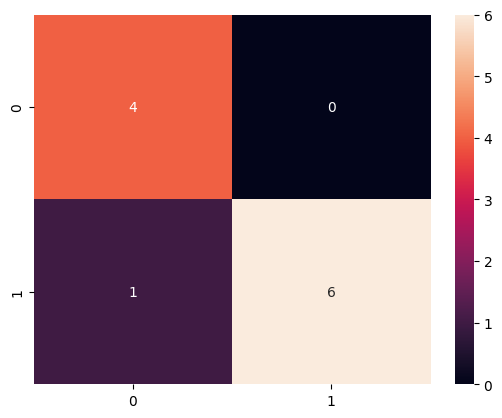

In [ ]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
clf9 = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf9.fit(x_pca_tr,y_tr)
xtraapred3 = clf9.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,xtraapred3))
print('f1-score:', f1_score(y_ts,xtraapred3))
sns.heatmap(confusion_matrix(y_ts,xtraapred3),annot=True,fmt='1d');

results['Statistical features -> Extraa tree classifier PCA'] = [accuracy_score(y_ts,xtraapred3), f1_score(y_ts,xtraapred3)]